In [75]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

Ознакомление с изображениями

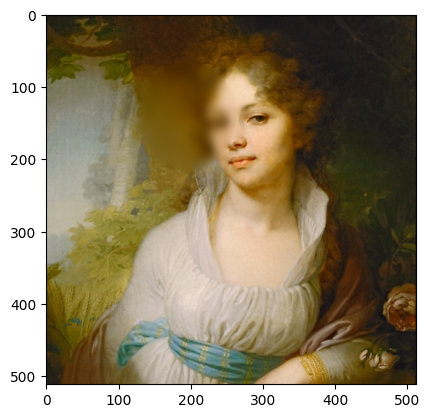

In [76]:
image1 = cv2.imread('data/lady/photo1.png',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

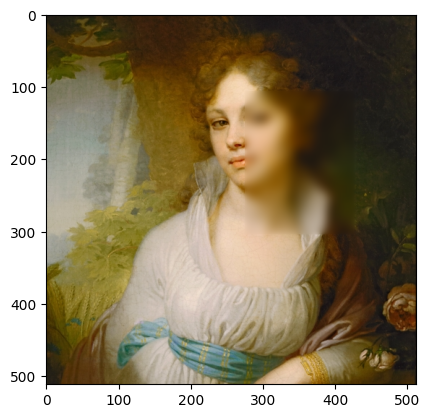

In [77]:
image2 = cv2.imread('data/lady/photo2.png',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

Применение вевлет-разложений Хаара к изображениям

In [78]:
wavelet = 'haar'

coef1 = pywt.wavedec2(image1, wavelet)
coef2 = pywt.wavedec2(image2, wavelet)

Слияние полученных коэффициентов

In [79]:
fused_coef = [coef1[0] + coef2[0] / 2]

for i in range(1, len(coef1)):
    cl = (coef1[i][0] + coef2[i][0]) / 2
    c2 = (coef1[i][1] + coef2[i][1]) / 2
    c3 = (coef1[i][2] + coef2[i][2]) / 2
    
    fused_coef.append((cl,c2,c3))

Применение обратного вейвлет-разложения и восстановление изображения

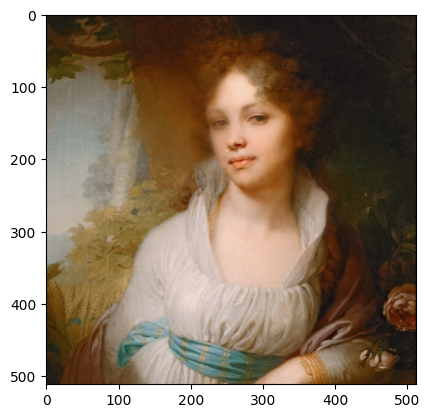

In [80]:
fused_image = pywt.waverec2(fused_coef, wavelet)

fused_image = np.multiply(np.divide(fused_image - np.min(fused_image), (np.max(fused_image) - np.min(fused_image))), 255)
fused_image = fused_image.astype(np.uint8)

plt.imshow(cv2.cvtColor(fused_image, cv2.COLOR_BGR2RGB))